In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

In [62]:
# Get dataset
data = pd.read_csv('data/preprocessed_dataset.csv')

In [63]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441257 entries, 0 to 441256
Data columns (total 46 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   CRGVPERS      23888 non-null   float64
 1   BPHIGH4       441256 non-null  float64
 2   CHECKUP1      441256 non-null  float64
 3   PREGNANT      64914 non-null   float64
 4   RCSRLTN2      59398 non-null   float64
 5   MEDCOST       441256 non-null  float64
 6   CHILDREN      441252 non-null  float64
 7   INCOME2       437959 non-null  float64
 8   LASTSMK2      122151 non-null  float64
 9   VETERAN3      441251 non-null  float64
 10  BLIND         430124 non-null  float64
 11  HTIN4         424079 non-null  float64
 12  FLUSHOT6      399932 non-null  float64
 13  POORHLTH      226851 non-null  float64
 14  SMOKDAY2      184119 non-null  float64
 15  ASTHNOW       59389 non-null   float64
 16  STOPSMK2      61486 non-null   float64
 17  CHOLCHK       382179 non-null  float64
 18  _BMI

# Cancer Relationship based on Sex

In [64]:
# See how many people have had heart attacks based on gender
plt.figure(figsize=(15,20))
df = data.groupby(['SEX','Cancerlabels']).size()

<Figure size 1080x1440 with 0 Axes>

In [65]:
data_to_plot = df.unstack()

In [66]:
data_to_plot

Cancerlabels,0,1
SEX,,
1.0,156542,30283
2.0,208751,45681


In [67]:
data_to_plot_transpose = data_to_plot.transpose()

In [68]:

data_to_plot_transpose

SEX,1.0,2.0
Cancerlabels,,
0,156542,208751
1,30283,45681


In [69]:
data_to_plot_transpose_percent = data_to_plot_transpose.div(data_to_plot_transpose.sum())

In [70]:
data_to_plot_transpose_percent

SEX,1.0,2.0
Cancerlabels,,
0,0.837907,0.820459
1,0.162093,0.179541


In [71]:
data_to_plot_percent = data_to_plot_transpose_percent.transpose()

In [72]:
data_to_plot_percent

Cancerlabels,0,1
SEX,,
1.0,0.837907,0.162093
2.0,0.820459,0.179541


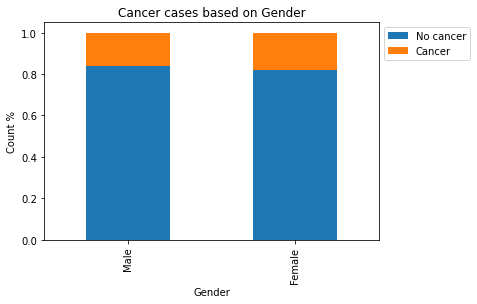

In [73]:
data_to_plot_percent.plot(kind='bar',stacked=True).legend(["No cancer", "Cancer"], loc='upper left', bbox_to_anchor=(1,1), ncol=1)
positions = (0, 1)
labels = ("Male", "Female")
plt.xticks(positions, labels)
plt.xlabel('Gender')
plt.ylabel('Count %')
plt.title("Cancer cases based on Gender")

plt.show()

# Cancer Relationship based on Chronic Health Diseases

In [75]:
# Convert values
data['HAVARTH3'].replace(2, 0, inplace=True)
data['HAVARTH3'].replace(7, np.nan, inplace=True)
data['HAVARTH3'].replace(9, np.nan, inplace=True)

In [77]:
# See how many people have had heart attacks based on gender
plt.figure(figsize=(15,20))
df2 = data.groupby(['HAVARTH3','Cancerlabels']).size()

<Figure size 1080x1440 with 0 Axes>

In [78]:
data_to_plot2 = df2.unstack()

In [79]:
data_to_plot2

Cancerlabels,0,1
HAVARTH3,,
0.0,252991,37597
1.0,110065,37934


In [80]:
data_to_plot_transpose2 = data_to_plot2.transpose()

In [81]:
data_to_plot_transpose2

HAVARTH3,0.0,1.0
Cancerlabels,,
0,252991,110065
1,37597,37934


In [82]:
data_to_plot_transpose_percent2 = data_to_plot_transpose2.div(data_to_plot_transpose2.sum())

In [83]:
data_to_plot_transpose_percent2

HAVARTH3,0.0,1.0
Cancerlabels,,
0,0.870618,0.743687
1,0.129382,0.256313


In [84]:
data_to_plot_percent2 = data_to_plot_transpose_percent2.transpose()

In [85]:
data_to_plot_percent2

Cancerlabels,0,1
HAVARTH3,,
0.0,0.870618,0.129382
1.0,0.743687,0.256313


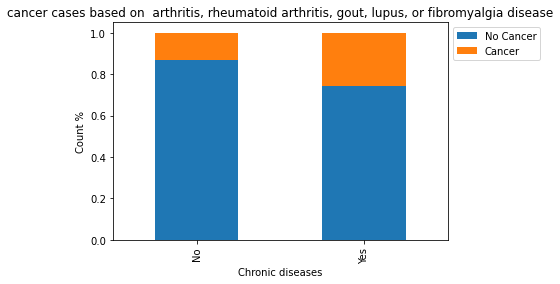

In [87]:
data_to_plot_percent2.plot(kind='bar',stacked=True).legend(["No Cancer", "Cancer"], loc='upper left', bbox_to_anchor=(1,1), ncol=1)
positions = (0, 1)
labels = ("No", "Yes")
plt.xticks(positions, labels)
plt.xlabel('Chronic diseases')
plt.ylabel('Count %')
plt.title("cancer cases based on  arthritis, rheumatoid arthritis, gout, lupus, or fibromyalgia disease")

plt.show()

In [26]:
#According to this dataset people who have chronic diseases are more sussceptible to get Cancer